### Aula 1 - Texto

- Introdução a NLP e pré-processamento de textos
- Bag of Words
- Modelos probabilísticos
- Word Embedding

#### Projeto
- Análise de sentimento do twitter

----

### Pré-processamento

In [29]:
# pré-processamento
# bibliotecas: nltk, spacy, Wordcloud, re (regex)

frase = "Olá ! Esse é o meu primeiro dia na aula de DNEII"
# stopwords: artigos, preopsições, palavras que pode retirar que não afetam (muito) o sentido da frase

import nltk

# Baixar o pacote de stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese') # 11, 12 idiomas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

#### Tokenização

In [31]:
# tokenização (usar o split)
tokens = frase.split()
print(tokens)

['Olá', '!', 'Esse', 'é', 'o', 'meu', 'primeiro', 'dia', 'na', 'aula', 'de', 'DNEII']


In [32]:
# Separando os tokens dos stopwords
clean_tokens = []
stop_tokens = []

for token in tokens:
    if token in stopwords:
        stop_tokens.append(token)

for token in tokens:
    if token not in stopwords:
        clean_tokens.append(token)

In [33]:
print(clean_tokens)
print()
print(stop_tokens)

['Olá', '!', 'Esse', 'primeiro', 'dia', 'aula', 'DNEII']

['é', 'o', 'meu', 'na', 'de']


In [34]:
# Juntar os tokens com " ".join(tokens)
frase_limpa = " ".join(clean_tokens)

print(frase_limpa)

Olá ! Esse primeiro dia aula DNEII


#### Minúsculo

In [35]:
# tudo em minúsculo
print(frase_limpa.lower())

olá ! esse primeiro dia aula dneii


#### Removendo os números com regex

In [36]:
import re

frase_2 = "Ganhei 1000 reais em prêmios!!! #goodday # estoucomsorte"
# fazer um tratamento de Regex

frase_2_sn = re.sub(r"\d", "", frase_2)
print(frase_2)
print()
print(frase_2_sn)

Ganhei 1000 reais em prêmios!!! #goodday # estoucomsorte

Ganhei  reais em prêmios!!! #goodday # estoucomsorte


#### Removendo caracteres especiais

In [37]:
frase_sce = re.sub(r"[^a-zA-Z]+", " ", frase_2)
print(frase_2)
print()
print(frase_sce)

Ganhei 1000 reais em prêmios!!! #goodday # estoucomsorte

Ganhei reais em pr mios goodday estoucomsorte


In [38]:
# pip install unidecode

#### Removendo acentos

In [39]:
# retirar acentos
from unidecode import unidecode

frase_2_sa = unidecode(frase_2)
print(frase_2)
print()
print(frase_2_sa)

Ganhei 1000 reais em prêmios!!! #goodday # estoucomsorte

Ganhei 1000 reais em premios!!! #goodday # estoucomsorte


#### Tokenização de palavras e por sentenças

In [41]:
from nltk.tokenize import word_tokenize, sent_tokenize
#nltk.download("punkt")

words = word_tokenize(frase_2) # por palavra
sent = sent_tokenize(frase_2) # por sentença

print(frase_2)
print()
print(words)
print(type(words))
print()
print(sent)
print(type(sent))

Ganhei 1000 reais em prêmios!!! #goodday # estoucomsorte

['Ganhei', '1000', 'reais', 'em', 'prêmios', '!', '!', '!', '#', 'goodday', '#', 'estoucomsorte']
<class 'list'>

['Ganhei 1000 reais em prêmios!!!', '#goodday # estoucomsorte']
<class 'list'>


#### Beautiful Soup

In [15]:
from bs4 import BeautifulSoup
import urllib.request

In [38]:
# urllib.request : Raspagem de texto
response = urllib.request.urlopen("https://pt.wikipedia.org/wiki/SpaceX")
html = response.read()

In [39]:
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()
text = text.lower()

In [40]:
import re

text = re.sub(r"[^\w\s]", " ", text)
text = re.sub("\d+", " ", text)

In [41]:
tokens = text.split()

In [42]:
len(tokens)

15848

In [43]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [44]:
clean_tokens = []
stop_tokens = []

for token in tokens:
    if token in stopwords:
        stop_tokens.append(token)

for token in tokens:
    if token not in stopwords:
        clean_tokens.append(token)

In [45]:
print(len(clean_tokens))
print(len(stop_tokens))

10540
5308


In [46]:
# FreqDist vem em formato de dicionário
freq_clean = nltk.FreqDist(clean_tokens)
freq_stop = nltk.FreqDist(stop_tokens)

In [47]:
for k, v in freq_stop.items():
    print(str(k) + ":" + str(v))    

a:431
para:187
o:221
uma:78
mais:22
um:119
de:1965
da:154
esta:3
como:27
os:72
estão:5
na:34
em:696
ao:15
do:153
e:216
das:14
são:15
há:1
com:132
à:22
no:107
é:31
foi:53
por:33
as:30
já:4
está:23
se:21
também:17
que:88
estiver:1
será:3
terá:1
sua:15
seu:15
ele:2
seria:1
mas:4
depois:4
não:13
quando:9
tinha:3
seus:12
era:6
até:18
foram:9
pelo:9
dos:36
pela:20
entre:3
essas:1
estavam:1
mesmo:5
nas:5
eles:6
isso:6
fossem:1
estava:2
este:18
sem:2
suas:4
ou:4
teve:1
aos:3
ser:4
às:2
nos:6
tem:6
deles:2
fora:1
estas:1
muito:1
esses:1
fosse:1
seriam:1
qual:1
eram:1
teria:1
houve:1
for:45
estar:1


In [48]:
for k, v in freq_clean.items():
    print(str(k) + ":" + str(v))    

spacex:363
wikipédia:6
enciclopédia:2
livre:2
saltar:1
conteúdo:2
alternar:1
barra:1
lateral:1
busca:1
criar:3
conta:3
ferramentas:2
pessoais:1
entrar:1
páginas:4
editores:1
conectados:1
saiba:1
discussãocontribuições:1
navegação:1
página:3
principalconteúdo:1
destacadoeventos:1
atuaisesplanadapágina:1
aleatóriaportaisinformar:1
erro:1
colaboração:2
boas:1
vindasajudapágina:1
testesportal:1
comunitáriomudanças:1
recentesmanutençãocriar:1
páginapáginas:1
novascontatodonativos:1
afluentesalterações:1
relacionadascarregar:1
ficheiropáginas:1
especiaishiperligação:1
permanenteinformações:1
páginacitar:1
páginaelemento:1
wikidata:2
imprimir:1
exportar:1
livrodescarregar:1
pdfversão:1
impressão:1
noutros:1
projetos:4
wikimedia:1
commons:5
idiomas:1
nesta:2
atalhos:1
idioma:1
parte:8
superior:1
frente:1
título:1
artigo:29
move:1
to:68
sidebar:1
esconder:1
início:10
história:5
toggle:5
subsection:4
fundação:4
falcon:153
primeiros:13
lançamentos:37
orbitais:5
contratos:22
dragon:85
nasa:85
come

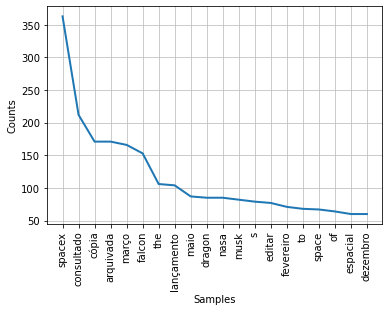

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [49]:
freq_clean.plot(20, cumulative = False)

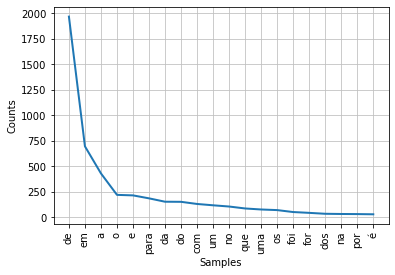

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [50]:
freq_stop.plot(20, cumulative = False) # 1/x

#### Normalização (stemmer -> raiz invariante comum)

In [56]:
# stemming (raiz invariante) e lemmatização: Nromalização de textos
from nltk.stem.porter import *

stemmer = PorterStemmer()

palavras = ["saying",
            "writing",
            "running",
            "going",
            "worked",
            "drunk", 
            "working"]

stem_palavras = []

for palavra in palavras:
    stemmed_palavras = stemmer.stem(palavra)
    stem_palavras.append(stemmed_palavras)

print(palavras)
print()
print(stem_palavras)

['saying', 'writing', 'running', 'going', 'worked', 'drunk', 'working']

['say', 'write', 'run', 'go', 'work', 'drunk', 'work']


In [58]:
from nltk.stem import SnowballStemmer

snow_st = SnowballStemmer.languages
snow_st

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

#### Lemmatização (dicionário léxico)

In [76]:
from nltk.stem import WordNetLemmatizer
#nltk.download("wordnet")
#nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("feet"))

# went : go
# saying : say
# rocks : rock
# running : run

foot


In [3]:
#pip install -U pip setuptools wheel

  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\gabri\\AppData\\Local\\Temp\\pip-uninstall-y8lhkiru\\wheel.exe'
Consider using the `--user` option or check the permissions.



In [3]:
#pip install spacy

# Usar esse para instalar os loads
#!python -m spacy download pt_core_news_sm

[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


2022-08-22 22:03:53.821959: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-22 22:03:53.822002: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-22 22:03:57.774234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-22 22:03:57.774968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-08-22 22:03:57.775850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-08-22 22:03:57.776678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [4]:
import spacy
from spacy.lang.pt.examples import sentences

nlp = spacy.load("pt_core_news_sm")

In [19]:
frase = nlp(u"Estou assistindo aula da disciplina de DNEII!")
tokens = [token for token in frase]

In [10]:
print(type(frase))

<class 'spacy.tokens.doc.Doc'>


In [11]:
print(tokens)

[Estou, assistindo, aula, da, disciplina, de, DNEII, !]


In [12]:
frase.text.split()

['Estou', 'assistindo', 'aula', 'da', 'disciplina', 'de', 'DNEII!']

In [13]:
tokens2 = [token for token in frase if not token.is_punct]

In [14]:
print(tokens2)

[Estou, assistindo, aula, da, disciplina, de, DNEII]


In [15]:
print(tokens2[0].similarity(tokens2[1]))

-0.008747001178562641


<ipython-input-15-0c71c8106c4e>:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(tokens2[0].similarity(tokens2[1]))


In [23]:
entidades = [(entidade, entidade.label_) for entidade in frase.ents]

In [26]:
frase.ents

()

In [24]:
entidades

[]